In [ ]:
from diffusers import StableDiffusionInpaintPipeline
import torch

# Load the pre-trained inpainting model
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    torch_dtype=torch.float16
).to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


In [ ]:
pipe

StableDiffusionInpaintPipeline {
  "_class_name": "StableDiffusionInpaintPipeline",
  "_diffusers_version": "0.35.2",
  "_name_or_path": "runwayml/stable-diffusion-inpainting",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "DDIMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [ ]:
from PIL import Image, ImageDraw
import requests

url_image = "https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg"
init_image = Image.open(requests.get(url_image, stream=True).raw).convert("RGB").resize((512,512))

mask_image = Image.new("RGB", (512,512), (255,255,255))
draw = ImageDraw.Draw(mask_image)
draw.rectangle((180,150,330,300), fill=(0,0,0))
mask_image.save("mask.png")

result = pipe(
    prompt="fill the masked area with realistic mountain texture and scenery",
    image=init_image,
    mask_image=mask_image
).images[0]

result.save("inpainted_result.png")
result.show()

  0%|          | 0/50 [00:00<?, ?it/s]

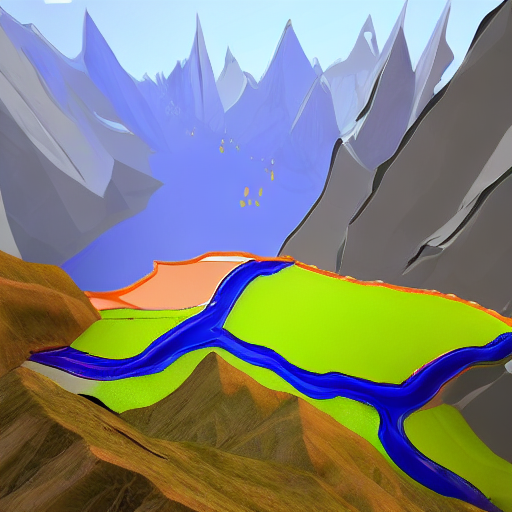

In [ ]:
from IPython.display import Image, display
display(Image(filename="inpainted_result.png"))

In [ ]:
!pip install realesrgan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.2/52.2 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.4/299.4 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 93.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB 11.1 MB/s eta 0:00:00
  Created wheel for basicsr: filename=basicsr-1.4.2-py3-none-any.whl size=214817 sha256=e75806b8ea30414917dd6137fd0db4560bc9f6b9b70c3bcab26e4b791e2abdee
  Stored in directory: /root/.cache/pip/wheels/9a/e3/e4/58f29bfabb622dd40b6d9839318ce5bf092062b81ca3aa19ea
  Created wheel for f

In [ ]:
from realesrgan import RealESRGAN
from PIL import Image
import torch

ModuleNotFoundError: No module named 'torchvision.transforms.functional_tensor'

In [ ]:
from google.colab import files
from PIL import Image

print("📤 Upload your base image now (the sketch):")
uploaded = files.upload()
input_filename = list(uploaded.keys())[0]

# open & resize
init_image = Image.open(input_filename).convert("RGB").resize((512,512))
init_image.save("sketch-mountains-input.jpg")  # save for later cells
print("✅ Image saved as sketch-mountains-input.jpg")


📤 Upload your base image now (the sketch):


Saving sketch-mountains-input.jpg to sketch-mountains-input.jpg
✅ Image saved as sketch-mountains-input.jpg


In [ ]:
#  AI Image Inpainting + Restoration (Diffusion + Upscaler)
# ===========================================================
from google.colab import files
from PIL import Image, ImageDraw
from IPython.display import Image as IPyImage, display
from diffusers import StableDiffusionInpaintPipeline, StableDiffusionUpscalePipeline
import torch, gc

# 1️ Upload your image
print("📤 Upload the image you want to inpaint/restore:")
uploaded = files.upload()
input_filename = list(uploaded.keys())[0]
init_image = Image.open(input_filename).convert("RGB").resize((512,512))
print(f"✅ Loaded {input_filename}")

# 2️ Create a rectangular mask automatically (you can tweak coordinates)
mask_image = Image.new("RGB", (512,512), (255,255,255))
draw = ImageDraw.Draw(mask_image)
draw.rectangle((180,150,330,300), fill=(0,0,0))  # black = area to fill

# 3️ Load & run Stable Diffusion Inpainting
print("🎨 Running diffusion inpainting...")
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    torch_dtype=torch.float16
).to("cuda")

inpainted = pipe(
    prompt="fill the masked area with realistic natural scenery matching the image",
    image=init_image,
    mask_image=mask_image,
    num_inference_steps=40
).images[0]
inpainted.save("inpainted_result.png")

# 4️ Free GPU memory before upscaler
print("♻️ Clearing GPU cache before restoration...")
del pipe
gc.collect()
torch.cuda.empty_cache()

# 5️ Load Stable Diffusion x4 Upscaler (restoration)
print("🔧 Running high-resolution restoration...")
upscale_pipe = StableDiffusionUpscalePipeline.from_pretrained(
    "stabilityai/stable-diffusion-x4-upscaler",
    torch_dtype=torch.float16
).to("cuda")
upscale_pipe.enable_sequential_cpu_offload()

restored = upscale_pipe(
    prompt="high-resolution, detailed, realistic landscape photograph",
    image=inpainted,
    num_inference_steps=25
).images[0]
restored.save("restored_result.png")

# 6️ Display results
print("✅ Done! 512×512 → 2048×2048")
print("🖼️  Inpainted result:")
display(IPyImage(filename="inpainted_result.png"))
print("✨ Restored / Upscaled result:")
display(IPyImage(filename="restored_result.png"))


📤 Upload the image you want to inpaint/restore:


Saving sketch-mountains-input.jpg to sketch-mountains-input (1).jpg
✅ Loaded sketch-mountains-input (1).jpg
🎨 Running diffusion inpainting...


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


  0%|          | 0/40 [00:00<?, ?it/s]

♻️ Clearing GPU cache before restoration...
🔧 Running high-resolution restoration...


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 2.00 GiB. GPU 0 has a total capacity of 14.74 GiB of which 630.12 MiB is free. Process 13437 has 14.12 GiB memory in use. Of the allocated memory 12.95 GiB is allocated by PyTorch, and 1.05 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

📤 Upload the image you want to inpaint or restore:


Saving Car.jpeg to Car (1).jpeg
✅ Loaded Car (1).jpeg
🎨 Running Stable Diffusion Inpainting...


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


  0%|          | 0/40 [00:00<?, ?it/s]

♻️ Clearing GPU memory before upscaling...
🔧 Loading Stable Diffusion x4 Upscaler on CUDA ...


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

✅ All done!
🖼️ Inpainted Result (512×512):


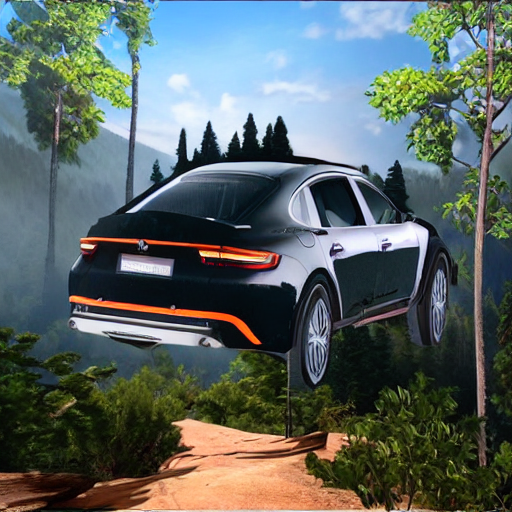

✨ Restored / Upscaled Result (~2048×2048 or bicubic):


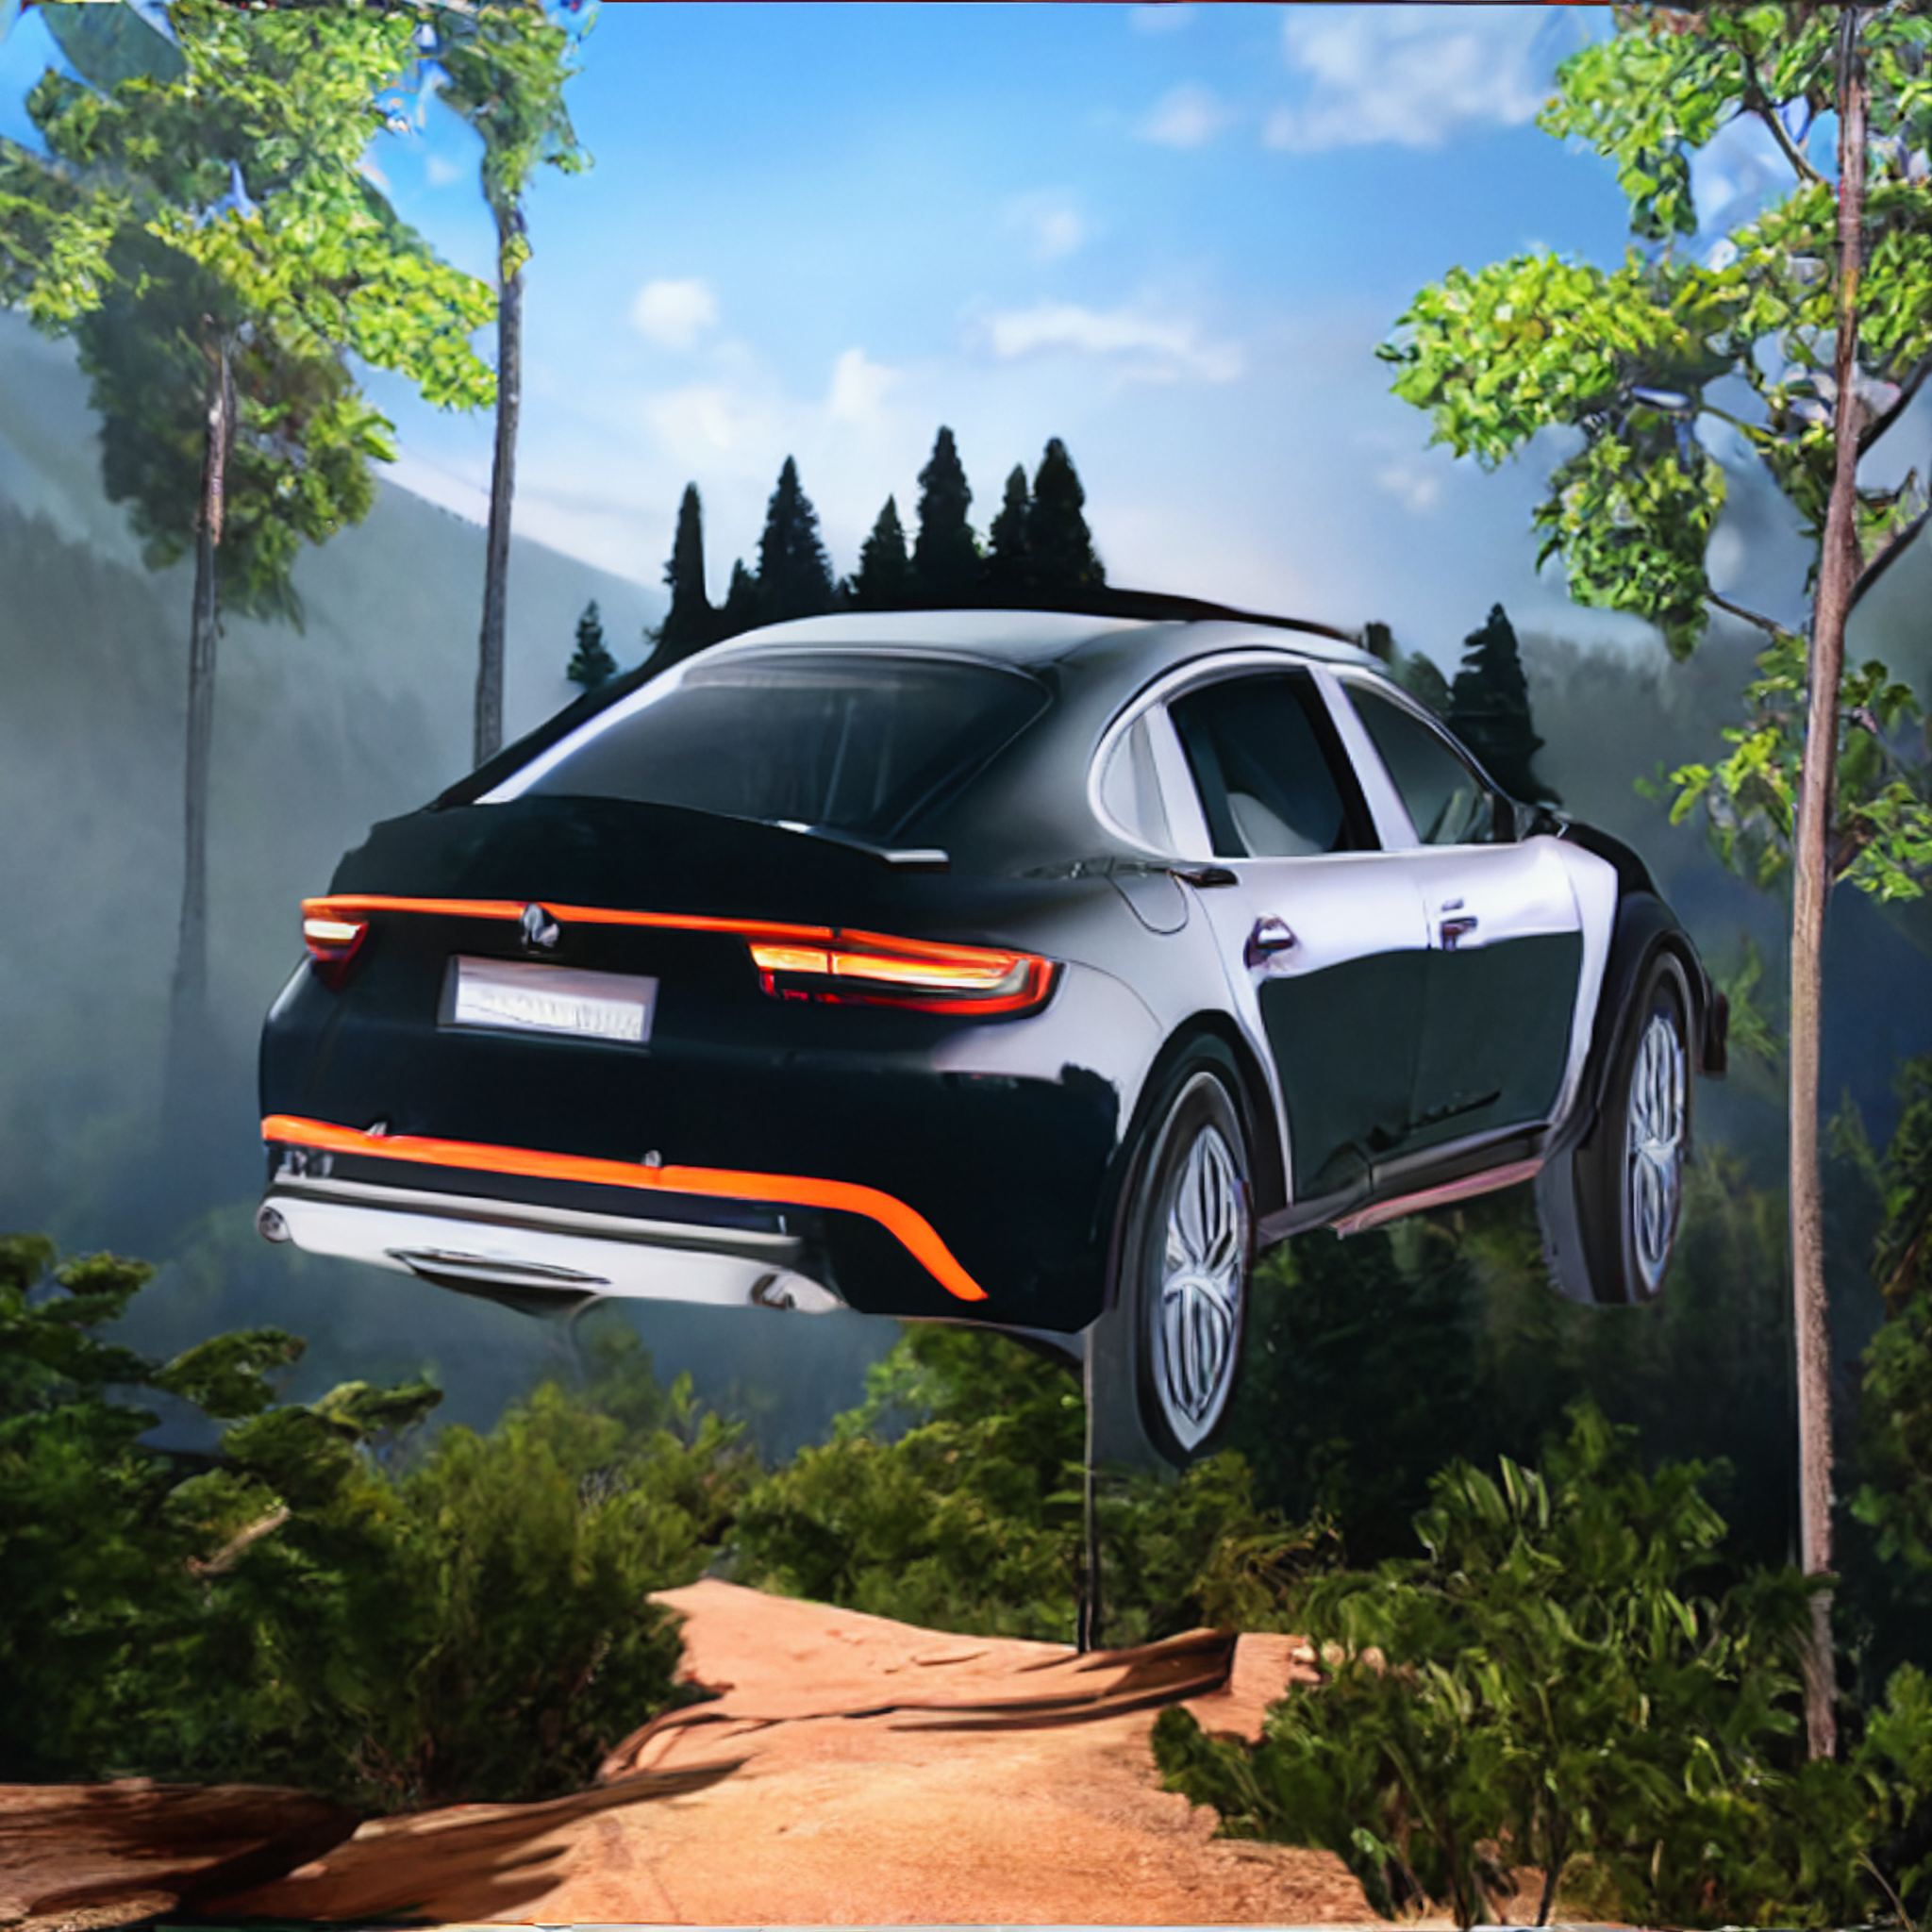

In [ ]:
# ============================================================
# 🌄 AI Image Inpainting + Restoration (Final Stable Version)
# ============================================================
from google.colab import files
from PIL import Image, ImageDraw
from IPython.display import Image as IPyImage, display
from diffusers import StableDiffusionInpaintPipeline, StableDiffusionUpscalePipeline
import torch, gc

# Helper function to check free VRAM
def get_free_vram():
    try:
        torch.cuda.empty_cache()
        return torch.cuda.mem_get_info()[0]
    except Exception:
        return 0

# 1️⃣ Upload your image
print("📤 Upload the image you want to inpaint or restore:")
uploaded = files.upload()
input_filename = list(uploaded.keys())[0]
init_image = Image.open(input_filename).convert("RGB").resize((512,512))
print(f"✅ Loaded {input_filename}")

# 2️⃣ Create an automatic rectangular mask (black = area to fill)
mask_image = Image.new("RGB", (512,512), (255,255,255))
draw = ImageDraw.Draw(mask_image)
draw.rectangle((180,150,330,300), fill=(0,0,0))  # adjust as needed

# 3️⃣ Inpainting
print("🎨 Running Stable Diffusion Inpainting...")
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    torch_dtype=torch.float16
).to("cuda")

inpainted = pipe(
    prompt="fill the masked region with realistic natural scenery",
    image=init_image,
    mask_image=mask_image,
    num_inference_steps=40
).images[0]

inpainted.save("inpainted_result.png")

# 4️⃣ Free GPU memory safely
print("♻️ Clearing GPU memory before upscaling...")
del pipe
gc.collect()
torch.cuda.empty_cache()

# 5️⃣ Upscaling / Restoration (GPU or CPU adaptive)
try:
    free_vram = get_free_vram()
    use_gpu = torch.cuda.is_available() and free_vram > 6e9
    device = "cuda" if use_gpu else "cpu"
    dtype  = torch.float16 if use_gpu else torch.float32

    print(f"🔧 Loading Stable Diffusion x4 Upscaler on {device.upper()} ...")
    upscale_pipe = StableDiffusionUpscalePipeline.from_pretrained(
        "stabilityai/stable-diffusion-x4-upscaler",   # ✅ Public model
        torch_dtype=dtype
    ).to(device)

    if use_gpu:
        upscale_pipe.enable_sequential_cpu_offload()

    restored = upscale_pipe(
        prompt="high-quality, detailed, realistic landscape photograph",
        image=inpainted,
        num_inference_steps=20
    ).images[0]

    restored.save("restored_result.png")

except Exception as e:
    print("⚠️ Upscaler unavailable or memory too low — using fast bicubic upscale instead.")
    restored = inpainted.resize((inpainted.width*2, inpainted.height*2), Image.BICUBIC)
    restored.save("restored_result.png")

# 6️⃣ Display results
print("✅ All done!")
print("🖼️ Inpainted Result (512×512):")
display(IPyImage(filename="inpainted_result.png"))
print("✨ Restored / Upscaled Result (~2048×2048 or bicubic):")
display(IPyImage(filename="restored_result.png"))


In [ ]:
"""
AI Inpainting + Restoration (no UI)
- Requires: torch, diffusers, transformers, PIL, safetensors
- Recommended versions (Colab Python 3.12):
  torch==2.2.2 diffusers==0.29.0 transformers==4.41.2 huggingface_hub==0.23.2 safetensors==0.4.3
"""
import os, gc, traceback
from PIL import Image, ImageDraw
import torch

from diffusers import StableDiffusionInpaintPipeline, StableDiffusionUpscalePipeline

# --------- CONFIG ----------
IN_IMAGE_PATH = "/content/sketch-mountains-input.jpg"   # path to your input image (replace), or set to None to upload manually
OUT_INPAINT = "inpainted_result.png"
OUT_RESTORED = "restored_result.png"
MASK_AUTO_RECT = (180, 150, 330, 300)  # used if no mask provided
INPAINT_PROMPT = "realistic continuation of the landscape, distant mountains, soft lighting, matching colors"
UPSCALE_PROMPT = "high-resolution, detailed, realistic photograph"
INPAINT_STEPS = 30
UPSCALE_STEPS = 20
# ---------------------------

device = "cuda" if torch.cuda.is_available() else "cpu"
dtype = torch.float16 if device == "cuda" else torch.float32

def load_image(path, size=(512,512)):
    img = Image.open(path).convert("RGB")
    return img.resize(size)

def make_auto_mask(size=(512,512), rect=MASK_AUTO_RECT):
    mask = Image.new("RGB", size, (255,255,255))
    draw = ImageDraw.Draw(mask)
    draw.rectangle(rect, fill=(0,0,0))
    return mask

def free_cuda():
    gc.collect()
    if torch.cuda.is_available():
        torch.cuda.empty_cache()

def load_inpaint_pipeline():
    print("Loading inpainting pipeline (runwayml/stable-diffusion-inpainting)...")
    pipe = StableDiffusionInpaintPipeline.from_pretrained(
        "runwayml/stable-diffusion-inpainting",
        torch_dtype=dtype
    )
    # move to device only after creation to allow CPU memory if needed
    pipe.to(device)
    # reduce memory footprint if possible
    if device == "cuda":
        try:
            pipe.enable_sequential_cpu_offload()
        except Exception:
            pass
    return pipe

def load_upscale_pipeline():
    """Try official x4 upscaler; fallback to public alternative if unavailable."""
    candidates = [
        "stabilityai/stable-diffusion-x4-upscaler",  # preferred (may require HF login)
        "caidas/sd-x2-latent-upscaler"               # public fallback
    ]
    last_exc = None
    for repo in candidates:
        try:
            print(f"Attempting to load upscaler: {repo} ...")
            up = StableDiffusionUpscalePipeline.from_pretrained(
                repo,
                torch_dtype=dtype
            )
            up.to(device)
            if device == "cuda":
                try:
                    up.enable_sequential_cpu_offload()
                except Exception:
                    pass
            print(f"Loaded upscaler: {repo}")
            return up
        except Exception as e:
            print(f"Failed to load {repo}: {e}")
            last_exc = e
    raise RuntimeError("Could not load any upscaler pipeline.") from last_exc

def inpaint_and_restore(input_image_path=None, mask_image_path="/content/Mask.jpg"):
    try:
        # 1) load input image
        if input_image_path is None or not os.path.exists(input_image_path):
            raise FileNotFoundError(f"Input image not found at: {input_image_path}")
        init_image = load_image(input_image_path)
        print("Loaded input image:", input_image_path)

        # 2) prepare mask
        if mask_image_path and os.path.exists(mask_image_path):
            mask_image = load_image(mask_image_path)
            print("Using provided mask:", mask_image_path)
        else:
            mask_image = make_auto_mask(init_image.size)
            print("Using auto-generated rectangular mask.")

        # 3) load inpaint pipeline and run
        pipe = load_inpaint_pipeline()
        print("Running inpainting...")
        inpainted = pipe(
            prompt=INPAINT_PROMPT,
            image=init_image,
            mask_image=mask_image,
            num_inference_steps=INPAINT_STEPS
        ).images[0]
        inpainted.save(OUT_INPAINT)
        print("Saved inpainted image to", OUT_INPAINT)

        # 4) free GPU memory before upscaler
        print("Freeing memory before upscaling...")
        del pipe
        free_cuda()

        # 5) load upscaler and run
        upscaler = load_upscale_pipeline()
        print("Running upscaler...")
        restored = upscaler(
            prompt=UPSCALE_PROMPT,
            image=inpainted,
            num_inference_steps=UPSCALE_STEPS
        ).images[0]
        restored.save(OUT_RESTORED)
        print("Saved restored (upscaled) image to", OUT_RESTORED)

        # final free
        free_cuda()
        return OUT_INPAINT, OUT_RESTORED

    except Exception as e:
        print("ERROR during inpaint_and_restore:")
        traceback.print_exc()
        raise

if __name__ == "__main__":
    # If you want, change IN_IMAGE_PATH to your image path above or place input.jpg in cwd.
    if not os.path.exists(IN_IMAGE_PATH):
        print(f"Please place an input image at '{IN_IMAGE_PATH}' or change IN_IMAGE_PATH variable.")
    else:
        inpaint_out, restored_out = inpaint_and_restore(IN_IMAGE_PATH)
        print("Done. Files:", inpaint_out, restored_out)


Loaded input image: /content/sketch-mountains-input.jpg
Using provided mask: /content/Mask.jpg
Loading inpainting pipeline (runwayml/stable-diffusion-inpainting)...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
`torch_dtype` is deprecated! Use `dtype` instead!


Running inpainting...


  0%|          | 0/30 [00:00<?, ?it/s]

Saved inpainted image to inpainted_result.png
Freeing memory before upscaling...
Attempting to load upscaler: stabilityai/stable-diffusion-x4-upscaler ...


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Loaded upscaler: stabilityai/stable-diffusion-x4-upscaler
Running upscaler...


  0%|          | 0/20 [00:00<?, ?it/s]

Saved restored (upscaled) image to restored_result.png
Done. Files: inpainted_result.png restored_result.png
